# Assessing Ad Clicks for Significance

We currently run an online advertisement with blue text. The stakeholder believes that blue may not be the most effective color for their ad. To test this, the stakeholder purchased 3000 ads every weekday for a month. Each ad contained a randomly-assigned text color out of a pool of 30 colors. (The text colors were evenly distributed, so 100 viewers would see 100 ads each day.) The ask: which colors have a significantly different click-through rate than blue? 

I will approach this ask in the following way:
1. Understand the problem, including the definitions of individual words/concepts.
2. Determine a minimum viable answer that we can use to make a decision and prompt further questions.
3. Identify any additional information that would be helpful (data, people, etc.) to have to get the minimum viable answer.
4. Obtain the data. 
5. Plan and execute the work required to get the minimum viable answer.
6. Review the results and determine if we need to do more work.
7. Iterate as needed.

## Understand the problem
The goal is to determine the most effective color for advertising the product. We want to know whether the color affects click-through rate. We will be able to determine this by comparing the click-through rate of each color to the click-through rate of blue. We will calculate the click-through rate as the number of daily clicks divided by the number of daily views.

## Determine a minimum viable answer
1. Does blue have the highest click-through rate?
2. If blue does not have the highest click-through rate, which color does?

## Additional data needed
The stakeholder provided a dataset containing the number of clicks and views for each color. This should be sufficient to calculate the click-through rate for each color. This is a one-time analysis, so pipeline development and implementation is not necessary at this time. Let's look at the data to see whether it is sufficient to answer the questions.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/ad_click_table.csv')
df.head()

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,View Count: Day 5,Click Count: Day 6,View Count: Day 6,Click Count: Day 7,View Count: Day 7,Click Count: Day 8,View Count: Day 8,Click Count: Day 9,View Count: Day 9,Click Count: Day 10,View Count: Day 10,Click Count: Day 11,View Count: Day 11,Click Count: Day 12,View Count: Day 12,Click Count: Day 13,View Count: Day 13,Click Count: Day 14,View Count: Day 14,Click Count: Day 15,View Count: Day 15,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
0,Pink,21,100,20,100,14,100,30,100,12,100,23,100,26,100,21,100,16,100,21,100,21,100,16,100,30,100,24,100,17,100,23,100,15,100,22,100,19,100,20,100
1,Gray,27,100,27,100,26,100,17,100,29,100,27,100,19,100,21,100,28,100,24,100,23,100,21,100,18,100,18,100,18,100,25,100,21,100,27,100,25,100,24,100
2,Sapphire,30,100,32,100,30,100,26,100,32,100,29,100,21,100,26,100,28,100,27,100,33,100,22,100,27,100,29,100,38,100,33,100,30,100,30,100,30,100,25,100
3,Purple,26,100,21,100,16,100,17,100,23,100,17,100,21,100,30,100,15,100,26,100,17,100,20,100,24,100,19,100,24,100,22,100,20,100,26,100,25,100,33,100
4,Coral,26,100,24,100,25,100,27,100,36,100,30,100,36,100,31,100,31,100,26,100,37,100,25,100,21,100,23,100,20,100,26,100,21,100,22,100,26,100,25,100


In [18]:
# Let's check the overall data quality

df.isna().sum().sum()

0

In [19]:
# It looks like there are no null values in the dataset.
# Let's check the five-number summary and uniqueness of the dataset.

df.describe(include='all')

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,View Count: Day 5,Click Count: Day 6,View Count: Day 6,Click Count: Day 7,View Count: Day 7,Click Count: Day 8,View Count: Day 8,Click Count: Day 9,View Count: Day 9,Click Count: Day 10,View Count: Day 10,Click Count: Day 11,View Count: Day 11,Click Count: Day 12,View Count: Day 12,Click Count: Day 13,View Count: Day 13,Click Count: Day 14,View Count: Day 14,Click Count: Day 15,View Count: Day 15,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
count,30,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0,30.000000,30.0
unique,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Pink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23.533333,100.0,24.433333,100.0,24.066667,100.0,24.366667,100.0,25.466667,100.0,23.533333,100.0,24.000000,100.0,24.700000,100.0,24.300000,100.0,23.666667,100.0,24.233333,100.0,23.466667,100.0,24.100000,100.0,22.733333,100.0,24.266667,100.0,24.200000,100.0,23.066667,100.0,23.933333,100.0,25.333333,100.0,24.366667,100.0
std,NaN,7.454382,0.0,5.864465,0.0,5.381535,0.0,5.738457,0.0,6.516469,0.0,5.986959,0.0,4.856563,0.0,6.325373,0.0,5.820001,0.0,5.121512,0.0,6.179406,0.0,5.035963,0.0,6.364503,0.0,5.800912,0.0,7.324655,0.0,6.042379,0.0,5.419844,0.0,5.930246,0.0,5.473027,0.0,6.065637,0.0
min,NaN,12.000000,100.0,15.000000,100.0,14.000000,100.0,16.000000,100.0,12.000000,100.0,11.000000,100.0,16.000000,100.0,13.000000,100.0,15.000000,100.0,16.000000,100.0,14.000000,100.0,14.000000,100.0,14.000000,100.0,15.000000,100.0,10.000000,100.0,16.000000,100.0,15.000000,100.0,12.000000,100.0,16.000000,100.0,12.000000,100.0
25%,NaN,19.250000,100.0,21.000000,100.0,20.500000,100.0,20.000000,100.0,21.250000,100.0,22.000000,100.0,21.000000,100.0,21.000000,100.0,19.500000,100.0,19.250000,100.0,18.250000,100.0,20.000000,100.0,18.250000,100.0,18.000000,100.0,18.000000,100.0,20.250000,100.0,20.000000,100.0,20.000000,100.0,22.000000,100.0,20.250000,100.0
50%,NaN,24.000000,100.0,24.000000,100.0,24.000000,100.0,23.000000,100.0,25.000000,100.0,23.000000,100.0,24.000000,100.0,24.500000,100.0,25.000000,100.0,23.500000,100.0,26.000000,100.0,24.000000,100.0,24.000000,100.0,22.000000,100.0,24.500000,100.0,23.000000,100.0,21.500000,100.0,24.000000,100.0,25.000000,100.0,24.000000,100.0
75%,NaN,26.750000,100.0,28.000000,100.0,27.000000,100.0,28.000000,100.0,29.000000,100.0,27.000000,100.0,27.000000,100.0,30.000000,100.0,27.000000,100.0,27.000000,100.0,28.000000,100.0,27.750000,100.0,28.750000,100.0,26.750000,100.0,28.250000,100.0,26.000000,100.0,25.750000,100.0,28.500000,100.0,26.000000,100.0,27.500000,100.0


In [20]:
# Let's make sure that the 'view' columns are actually unique. If so, we can remove them.

import numpy as np
view_columns = [column for column in df.columns if "view" in column.lower()]
assert np.all(df[view_columns].values==100)


In [21]:
# It looks like the view column values are all '100'. 
# We can remove them as they do not provide any useful information.

df = df.drop(view_columns, axis=1)

In [22]:
df.head()

,Color,Click Count: Day 1,Click Count: Day 2,Click Count: Day 3,Click Count: Day 4,Click Count: Day 5,Click Count: Day 6,Click Count: Day 7,Click Count: Day 8,Click Count: Day 9,Click Count: Day 10,Click Count: Day 11,Click Count: Day 12,Click Count: Day 13,Click Count: Day 14,Click Count: Day 15,Click Count: Day 16,Click Count: Day 17,Click Count: Day 18,Click Count: Day 19,Click Count: Day 20
0,Pink,21,20,14,30,12,23,26,21,16,21,21,16,30,24,17,23,15,22,19,20
1,Gray,27,27,26,17,29,27,19,21,28,24,23,21,18,18,18,25,21,27,25,24
2,Sapphire,30,32,30,26,32,29,21,26,28,27,33,22,27,29,38,33,30,30,30,25
3,Purple,26,21,16,17,23,17,21,30,15,26,17,20,24,19,24,22,20,26,25,33
4,Coral,26,24,25,27,36,30,36,31,31,26,37,25,21,23,20,26,21,22,26,25


In [23]:
# Each row represents one color, so let's reindex the DataFrame. 
# This will make it easier to work with the data.

df = df.set_index('Color')

In [24]:
# Let's convert the clicks to decimal values to represent click-through percentages.

df = df/100

In [25]:
# Check the distribution of the clicks
df.describe()

,Click Count: Day 1,Click Count: Day 2,Click Count: Day 3,Click Count: Day 4,Click Count: Day 5,Click Count: Day 6,Click Count: Day 7,Click Count: Day 8,Click Count: Day 9,Click Count: Day 10,Click Count: Day 11,Click Count: Day 12,Click Count: Day 13,Click Count: Day 14,Click Count: Day 15,Click Count: Day 16,Click Count: Day 17,Click Count: Day 18,Click Count: Day 19,Click Count: Day 20
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.235333,0.244333,0.240667,0.243667,0.254667,0.235333,0.240000,0.247000,0.2430,0.236667,0.242333,0.234667,0.241000,0.227333,0.242667,0.242000,0.230667,0.239333,0.253333,0.243667
std,0.074544,0.058645,0.053815,0.057385,0.065165,0.059870,0.048566,0.063254,0.0582,0.051215,0.061794,0.050360,0.063645,0.058009,0.073247,0.060424,0.054198,0.059302,0.054730,0.060656
min,0.120000,0.150000,0.140000,0.160000,0.120000,0.110000,0.160000,0.130000,0.1500,0.160000,0.140000,0.140000,0.140000,0.150000,0.100000,0.160000,0.150000,0.120000,0.160000,0.120000
25%,0.192500,0.210000,0.205000,0.200000,0.212500,0.220000,0.210000,0.210000,0.1950,0.192500,0.182500,0.200000,0.182500,0.180000,0.180000,0.202500,0.200000,0.200000,0.220000,0.202500
50%,0.240000,0.240000,0.240000,0.230000,0.250000,0.230000,0.240000,0.245000,0.2500,0.235000,0.260000,0.240000,0.240000,0.220000,0.245000,0.230000,0.215000,0.240000,0.250000,0.240000
75%,0.267500,0.280000,0.270000,0.280000,0.290000,0.270000,0.270000,0.300000,0.2700,0.270000,0.280000,0.277500,0.287500,0.267500,0.282500,0.260000,0.257500,0.285000,0.260000,0.275000
max,0.490000,0.410000,0.340000,0.360000,0.420000,0.370000,0.360000,0.360000,0.4400,0.350000,0.370000,0.310000,0.360000,0.390000,0.390000,0.380000,0.350000,0.340000,0.400000,0.410000


In [26]:
# Let's get averages and standard deviations of the clicks for each color to measure centrality and dispersion.

df["avg_clicks"] = df.apply(lambda x: x.mean(), axis=1)
df["std_clicks"] = df.apply(lambda x: x.std(), axis=1)

In [27]:
# Examine the average and standard deviation of the colors.

df[["avg_clicks", "std_clicks"]]

,avg_clicks,std_clicks
Color,,
Pink,0.2055,0.046848
Gray,0.2325,0.037533
Sapphire,0.2890,0.038197
Purple,0.2210,0.046357
Coral,0.2690,0.049487
Olive,0.2115,0.051892
Navy,0.2930,0.048487
Maroon,0.2310,0.038717
Teal,0.2845,0.040432


In [28]:
# Let's look at the mean and standard deviation in more detail.

df[["avg_clicks", "std_clicks"]].describe()

,avg_clicks,std_clicks
count,30.000000,30.000000
mean,0.240883,0.046696
std,0.036052,0.007251
min,0.205500,0.030899
25%,0.213625,0.040650
50%,0.223250,0.048661
75%,0.277250,0.051795
max,0.342000,0.058788


/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1

<Axes: ylabel='Count'>

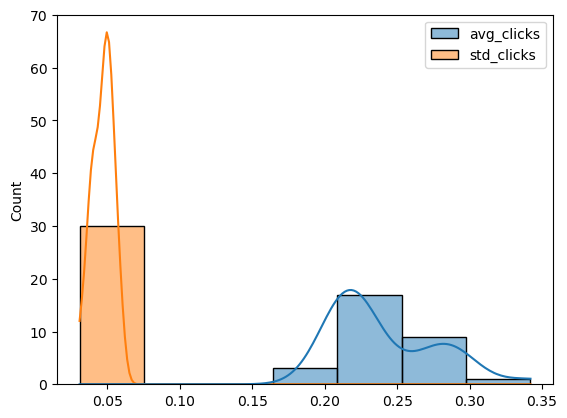

In [29]:
import seaborn as sns
sns.histplot(df[["avg_clicks", "std_clicks"]], kde=True)

The click-through standard deviation is roughly normal without enough skew to worry too much about it. The bimodal click-through mean rates suggests that there are two groups of colors with different click-through rates. The stakeholder may want to consider segmenting their audience based on the color of the ad.

Looking at blue specifically, we can see that it has an average click-through rate of 27.3%, which is higher than the average click-through rate of 23.2%. It is also higher than the 75th percentile of click-through rates. However, there are a few colors with higher average click-through rates than blue:
- Ultramarine: 32.9%
- Sapphire (Mean: 27.8%, Standard Deviation: 6.5%)
- Aquamarine (Mean: 28.1%, Standard Deviation: 7.5%)
- Teal (Mean: 27.4%, Standard Deviation: 6.5%)

These are all colors that have blue as a their primary colors, so the business doesn't need to make a major pivot in their color scheme right now.

However, we need to address a couple of issues:
1. The standard deviation of blue's click-through rate is 7.1%, which is quite high relative to other colors. This suggests a higher variability with blue's click-through rate.
2. The click-through rate for blue is higher than the average click-through rate, but we need to determine whether this difference is statistically significant.

Thinking past the minimum viable answer presentation, it may be interesting to ask some follow-up questions:
1. Does time-series analysis on the leading click-through rates indicate any exploitable trends?
2. Does the bimodal average click-through rate present any opportunities for customer segmentation and targeted advertising?

## Plan and execute the work
Recall that the minimum viable answers required are:
1. Does blue have the highest click-through rate?
2. If blue does not have the highest click-through rate, which color does? 

The answer to the above two questions is, practically, that blue does not have the highest average click-through rates. However, it is still important to determine whether the difference in click-through rates between blue and the other four previously-identified colors is statistically significant.

In [30]:
# Capture the top colors based on the average clicks into a separate DataFrame.
# This should make the statistical analysis easier.

top_colors = df.loc[["Blue", "Ultramarine", "Sapphire", "Teal", "Aquamarine"]].iloc[:, :-2].T.reset_index(drop=True)

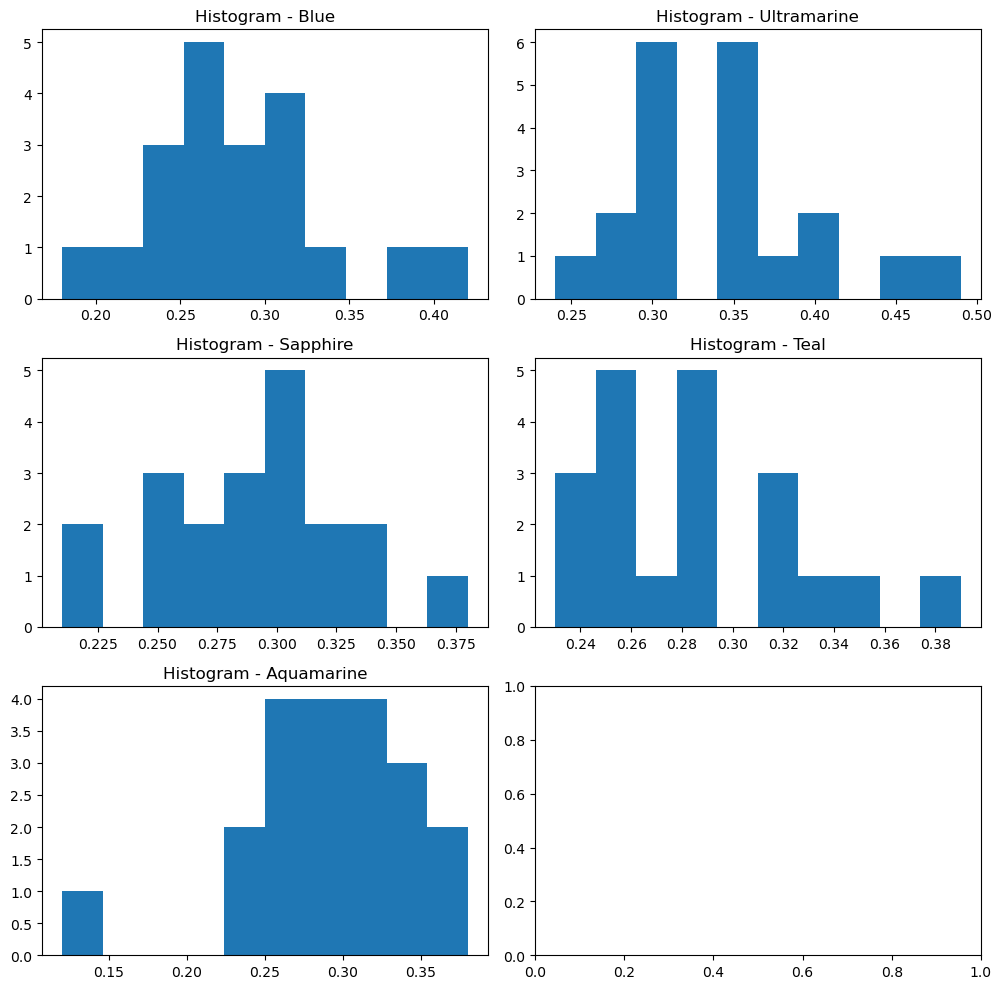

In [31]:
# Determining normality and variance equality guides which hypothesis test to use.
# If the data is normally distributed and the variances are equal, we can use a t-test.
# Otherwise, we can use a non-parametric test like the Kruskal-Wallis test or permutation.
# Let's look at the histogram plots of the top colors.

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes[0, 0].hist(top_colors["Blue"])
axes[0, 0].set_title("Histogram - Blue")

axes[0, 1].hist(top_colors["Ultramarine"])
axes[0, 1].set_title("Histogram - Ultramarine")

axes[1, 0].hist(top_colors["Sapphire"])
axes[1, 0].set_title("Histogram - Sapphire")

axes[1, 1].hist(top_colors["Teal"])
axes[1, 1].set_title("Histogram - Teal")

axes[2, 0].hist(top_colors["Aquamarine"])
axes[2, 0].set_title("Histogram - Aquamarine")

plt.tight_layout()
plt.show()

In [32]:
# I'm not confident in the data's normality off visual inspection alone.
# Let's perform a Shapiro-Wilk normality test to determine if the data is normally distributed.

from scipy import stats

# Perform Shapiro-Wilk test for each column
blue_normality = stats.shapiro(top_colors["Blue"])
ultramarine_normality = stats.shapiro(top_colors["Ultramarine"])
sapphire_normality = stats.shapiro(top_colors["Sapphire"])
teal_normality = stats.shapiro(top_colors["Teal"])
aquamarine_normality = stats.shapiro(top_colors["Aquamarine"])

# Print the results
print("Shapiro-Wilk test for normality:")
print(
    f"Blue: statistic = {blue_normality.statistic:.4f}, p-value = {blue_normality.pvalue:.4f}"
)
print(
    f"Ultramarine: statistic = {ultramarine_normality.statistic:.4f}, p-value = {ultramarine_normality.pvalue:.4f}"
)
print(
    f"Sapphire: statistic = {sapphire_normality.statistic:.4f}, p-value = {sapphire_normality.pvalue:.4f}"
)
print(
    f"Teal: statistic = {teal_normality.statistic:.4f}, p-value = {teal_normality.pvalue:.4f}"
)
print(
    f"Aquamarine: statistic = {aquamarine_normality.statistic:.4f}, p-value = {aquamarine_normality.pvalue:.4f}"
)

Shapiro-Wilk test for normality:
Blue: statistic = 0.9416, p-value = 0.2566
Ultramarine: statistic = 0.9563, p-value = 0.4723
Sapphire: statistic = 0.9669, p-value = 0.6896
Teal: statistic = 0.9276, p-value = 0.1387
Aquamarine: statistic = 0.9224, p-value = 0.1103


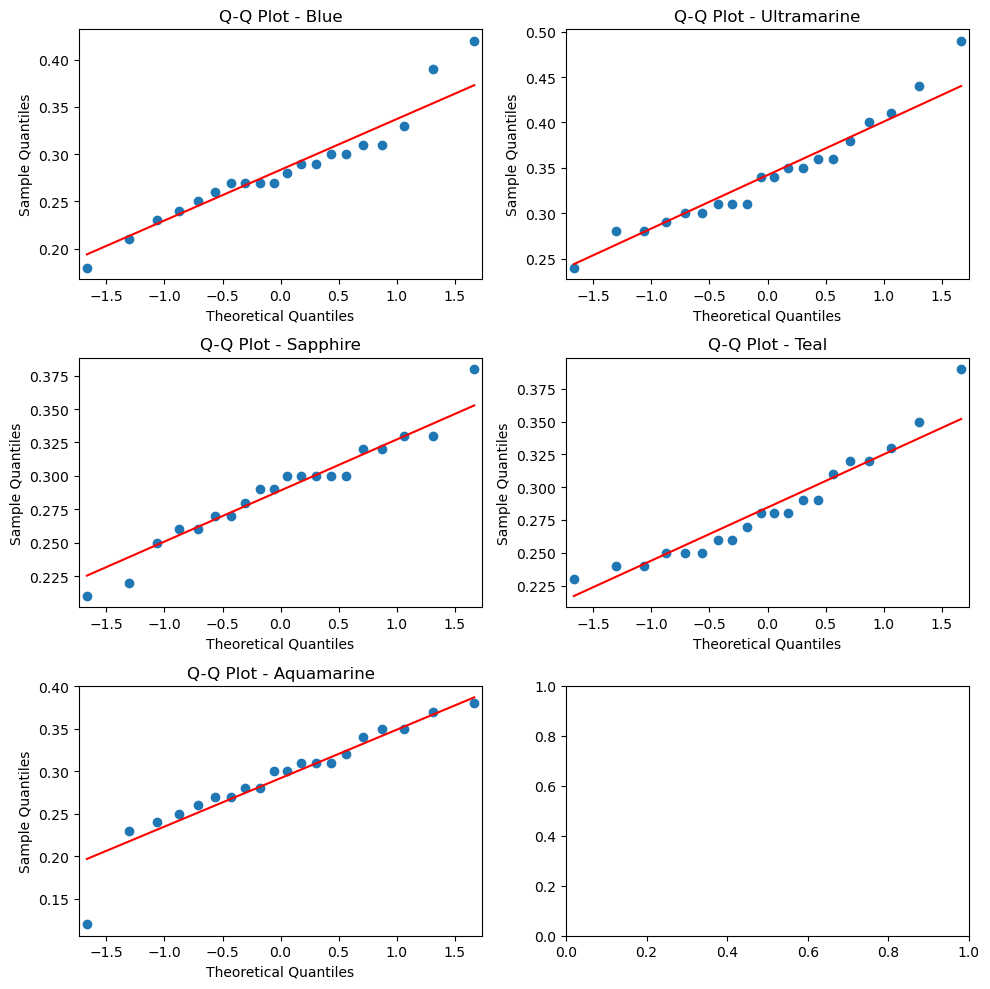

In [33]:
# Shapiro-Wilk indicates that they're all normal.
# Let's look at Q-Q plots just to be sure.

import statsmodels.api as sm

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

sm.qqplot(top_colors["Blue"], line="s", ax=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot - Blue")

sm.qqplot(top_colors["Ultramarine"], line="s", ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot - Ultramarine")

sm.qqplot(top_colors["Sapphire"], line="s", ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot - Sapphire")

sm.qqplot(top_colors["Teal"], line="s", ax=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot - Teal")

sm.qqplot(top_colors["Aquamarine"], line="s", ax=axes[2, 0])
axes[2, 0].set_title("Q-Q Plot - Aquamarine")

plt.tight_layout()
plt.show()

In [34]:
# Let's check for equal variance using Levene's test.
from scipy.stats import levene

bu_stat, bu_p = levene(top_colors["Blue"], top_colors["Ultramarine"])
print("Levene's Test (Blue vs Ultramarine):")
print(f"Test Statistic: {bu_stat:.4f}")
print(f"p-value: {bu_p:.4f}")

bs_stat, bs_p = levene(top_colors["Blue"], top_colors["Sapphire"])
print("Levene's Test (Blue vs Ultramarine):")
print(f"Test Statistic: {bs_stat:.4f}")
print(f"p-value: {bs_p:.4f}")

bt_stat, bt_p = levene(top_colors["Blue"], top_colors["Teal"])
print("Levene's Test (Blue vs Ultramarine):")
print(f"Test Statistic: {bt_stat:.4f}")
print(f"p-value: {bt_p:.4f}")

ba_stat, ba_p = levene(top_colors["Blue"], top_colors["Aquamarine"])
print("Levene's Test (Blue vs Aquamarine):")
print(f"Test Statistic: {ba_stat:.4f}")
print(f"p-value: {ba_p:.4f}")

Levene's Test (Blue vs Ultramarine):
Test Statistic: 0.3808
p-value: 0.5409
Levene's Test (Blue vs Ultramarine):
Test Statistic: 0.8101
p-value: 0.3738
Levene's Test (Blue vs Ultramarine):
Test Statistic: 0.4380
p-value: 0.5121
Levene's Test (Blue vs Aquamarine):
Test Statistic: 0.0774
p-value: 0.7824


In [35]:
# Shapiro-Wilk indicates that the data is normally distributed; Levene's test indicate equal variance.
# That's convincing enough for me.
# Let's perform two-sample T-tests to determine if the colors have different click-through rates.

blue_vs_ultramarine = stats.ttest_ind(top_colors["Blue"], top_colors["Ultramarine"])
blue_vs_sapphire = stats.ttest_ind(top_colors["Blue"], top_colors["Sapphire"])
blue_vs_teal = stats.ttest_ind(top_colors["Blue"], top_colors["Teal"])
blue_vs_aquamarine = stats.ttest_ind(top_colors["Blue"], top_colors["Aquamarine"])

# Print the results
print("Blue vs Ultramarine:")
print(f"t-statistic: {blue_vs_ultramarine.statistic:.4f}")
print(f"p-value: {blue_vs_ultramarine.pvalue:.4f}")

print("\nBlue vs Sapphire:")
print(f"t-statistic: {blue_vs_sapphire.statistic:.4f}")
print(f"p-value: {blue_vs_sapphire.pvalue:.4f}")

print("\nBlue vs Teal:")
print(f"t-statistic: {blue_vs_teal.statistic:.4f}")
print(f"p-value: {blue_vs_teal.pvalue:.4f}")

print("\nBlue vs Aquamarine:")
print(f"t-statistic: {blue_vs_aquamarine.statistic:.4f}")
print(f"p-value: {blue_vs_aquamarine.pvalue:.4f}")

Blue vs Ultramarine:
t-statistic: -3.2053
p-value: 0.0027

Blue vs Sapphire:
t-statistic: -0.3643
p-value: 0.7177

Blue vs Teal:
t-statistic: -0.0649
p-value: 0.9486

Blue vs Aquamarine:
t-statistic: -0.4737
p-value: 0.6385


In [36]:
# Let's run a Bonferroni correction to adjust for multiple comparisons.
p_values = [blue_vs_ultramarine.pvalue, blue_vs_sapphire.pvalue, blue_vs_teal.pvalue, blue_vs_aquamarine.pvalue]
n_tests = 4
alpha = 0.05
bonferroni_alpha = alpha / n_tests
significant = [p < bonferroni_alpha for p in p_values]

print(f"Bonferroni-adjusted alpha: {bonferroni_alpha}")
print(f"Significant results: {significant}")

Bonferroni-adjusted alpha: 0.0125
Significant results: [True, False, False, False]


In [37]:
# Ultramarine has the highest practical significance, and its difference is statistically significant vs. Blue.
# However, is it statistically significant vs. Aquamarine, the color with the second-highest click-through rate?

ultramarine_vs_aquamarine = stats.ttest_ind(top_colors["Ultramarine"], top_colors["Aquamarine"])

print("Ultramarine vs. Aquamarine:")
print(f"t-statistic: {ultramarine_vs_aquamarine.statistic:.4f}")
print(f"p-value: {ultramarine_vs_aquamarine.pvalue:.4f}")

Ultramarine vs. Aquamarine:
t-statistic: 2.6622
p-value: 0.0113


## Minimum viable answer
The minimum viable answer is that blue does not have the highest click-through rate. The colors with higher click-through rates are Ultramarine, Sapphire, Aquamarine, and Teal. Practically and statistically, ultramarine has the highest click-through rate: not only against blue, but also against aquamarine, its closest competitor. Thus **the stakeholder should consider using ultramarine as the primary color for their ads if they want to maximize click-through rates and are constrained to only one color.** 

It is worth noting that the choice of analysis may have affected the statistical significance. For example, using a non-parametric test like permutation or Kruskal-Wallis against the entire dataset may have yielded different results with respect to statistical significance. It is important to remember that ultramarine was also the color with the highest practical click-through rate by a significant margin in the dataset, which is most likely reason enough to change to that color considering the low switching costs in this specific scenario. 

## Time series analysis
It is worth taking a glance at the time series data to see if there are any trends that can be exploited. Let's look at the click-through rates for the top five colors over time.

/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/ads/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

Text(0.5, 1.0, 'Click-through Rates Over Time')

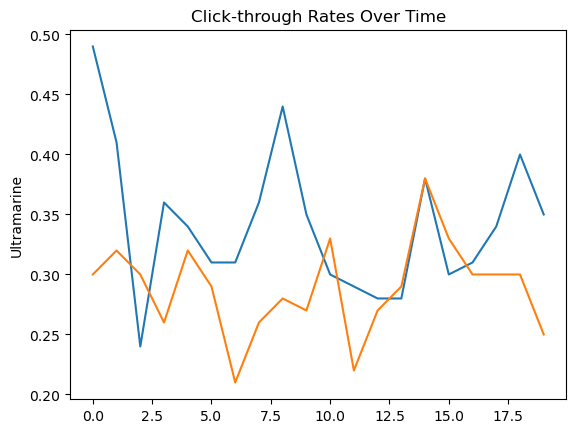

In [46]:
ax = sns.lineplot(data=top_colors["Ultramarine"])
ax = sns.lineplot(data=top_colors["Sapphire"])
ax.set_title('Click-through Rates Over Time')

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

u_decompose = seasonal_decompose(top_colors["Ultramarine"], model="additive", period=1)

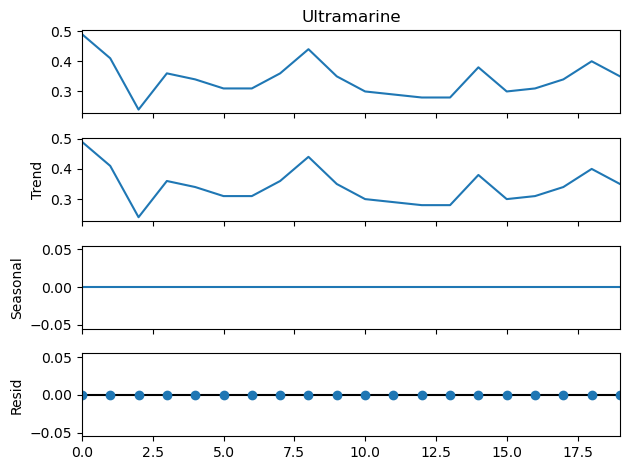

In [43]:
u_decompose.plot()
plt.show()